In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("F:\PGDDS\PGD_Data_Science\csv_data\customerchurn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.drop("customerID", axis = 1, inplace = True)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
df1= df.copy()

In [13]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

In [14]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [15]:
pd.to_numeric(df1['TotalCharges'], errors='coerce')[488]

nan

In [16]:
df1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
df1.dropna(inplace = True)

In [18]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df1.shape

(7032, 20)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [21]:
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [22]:
df1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
for i in df1:
    print(df1[i].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [24]:
for i in df1:
    print(i, ":", df1[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [25]:
df1.replace('No phone service', 'No', inplace = True)

In [26]:
df1.replace('No internet service', 'No', inplace = True)

In [27]:
for i in df1:
    print(i, ":", df1[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [28]:
df1.replace({'Yes' : 1, 'No':0, "Female":0, "Male":1}, inplace = True)

In [29]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [30]:
final = pd.get_dummies(data = df1, drop_first=True)

In [31]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [32]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [33]:
tenure0 = final[final['Churn'] == 0].tenure

In [34]:
tenure0

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [35]:
tenure1 = final[final['Churn'] == 1].tenure

In [36]:
tenure1

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

In [37]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Tenure analysis')

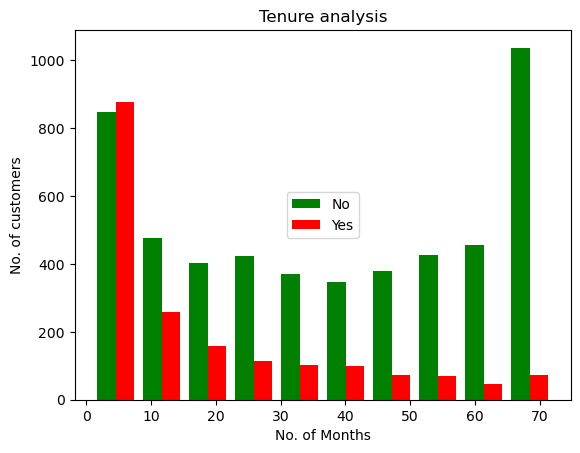

In [38]:
plt.hist([tenure0, tenure1], color = ['green', 'red'], label = ['No', 'Yes'])
plt.xlabel("No. of Months")
plt.ylabel("No. of customers")
plt.legend(loc = "center")
plt.title("Tenure analysis")

- for monthly charges

In [39]:
monthlyChareges0 = final[final['Churn'] == 0].MonthlyCharges
monthlyChareges1 = final[final['Churn'] == 1].MonthlyCharges

Text(0.5, 1.0, 'Monthly charges analysis')

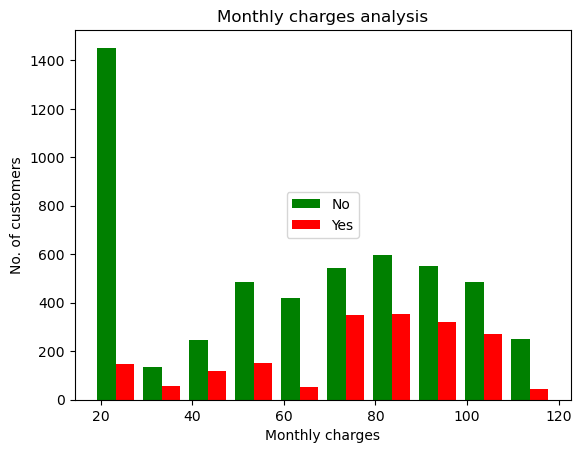

In [40]:
plt.hist([monthlyChareges0, monthlyChareges1], color = ['green', 'red'], label = ['No', 'Yes'])
plt.xlabel("Monthly charges")
plt.ylabel("No. of customers")
plt.legend(loc = "center")
plt.title("Monthly charges analysis")

In [41]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [42]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [43]:
X = final.drop("Churn", axis = 1)

In [44]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,0,1,0,0,0,1,0


In [45]:
y = final.Churn

In [46]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
scaled = scaler.fit_transform(X)

In [50]:
scaled

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [51]:
scaled.shape

(7032, 23)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
X_train.shape

(5625, 23)

In [55]:
X_test.shape

(1407, 23)

In [56]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape = (23, ), activation = 'sigmoid')
])

In [57]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics = ['accuracy'])

In [58]:
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
176/176 [==============================] - 1s 1ms/step - loss: 141.3905 - accuracy: 0.7342
Epoch 2/1000
176/176 [==============================] - 0s 1ms/step - loss: 74.6291 - accuracy: 0.7444
Epoch 3/1000
176/176 [==============================] - 0s 1ms/step - loss: 17.0263 - accuracy: 0.6519
Epoch 4/1000
176/176 [==============================] - 0s 1ms/step - loss: 4.5358 - accuracy: 0.5353
Epoch 5/1000
176/176 [==============================] - 0s 1ms/step - loss: 2.2469 - accuracy: 0.5516
Epoch 6/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.7431 - accuracy: 0.6704
Epoch 7/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.5072 - accuracy: 0.7767
Epoch 8/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4893 - accuracy: 0.7829
Epoch 9/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7815
Epoch 10/1000
176/176 [==============================] - 0s 1ms/step - loss: 0

176/176 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.7936
Epoch 81/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7940
Epoch 82/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.7970
Epoch 83/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.7952
Epoch 84/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.7982
Epoch 85/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.7964
Epoch 86/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.7906
Epoch 87/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.7897
Epoch 88/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.7947
Epoch 89/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.4405 - a

176/176 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.7911
Epoch 160/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.7936
Epoch 161/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.7954
Epoch 162/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.7911
Epoch 163/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.7977
Epoch 164/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8007
Epoch 165/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7883
Epoch 166/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.7899
Epoch 167/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.7932
Epoch 168/1000
176/176 [==============================] - 0s 1ms/step - loss: 0

176/176 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.7895
Epoch 238/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.7934
Epoch 239/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.7876
Epoch 240/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7927
Epoch 241/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.7957
Epoch 242/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.7991
Epoch 243/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7890
Epoch 244/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.7961
Epoch 245/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.8004
Epoch 246/1000
176/176 [==============================] - 0s 1ms/step - loss: 0

176/176 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.7936
Epoch 316/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.7963
Epoch 317/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.7909
Epoch 318/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.7956
Epoch 319/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4512 - accuracy: 0.7948
Epoch 320/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.7929
Epoch 321/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.7968
Epoch 322/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4515 - accuracy: 0.7915
Epoch 323/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4655 - accuracy: 0.7924
Epoch 324/1000
176/176 [==============================] - 0s 1ms/step - loss: 0

176/176 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7957
Epoch 394/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7952
Epoch 395/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7860
Epoch 396/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7838
Epoch 397/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.7984
Epoch 398/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7897
Epoch 399/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.7966
Epoch 400/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.7929
Epoch 401/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7890
Epoch 402/1000
176/176 [==============================] - 0s 1ms/step - loss: 0

176/176 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8000
Epoch 472/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.7920
Epoch 473/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.7927
Epoch 474/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.7959
Epoch 475/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7931
Epoch 476/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.7973
Epoch 477/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.7959
Epoch 478/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.7886
Epoch 479/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.7970
Epoch 480/1000
176/176 [==============================] - 0s 1ms/step - loss: 0

176/176 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7959
Epoch 550/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.7883
Epoch 551/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.7927
Epoch 552/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.7865
Epoch 553/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.7920
Epoch 554/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.7924
Epoch 555/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.7972
Epoch 556/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.7963
Epoch 557/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.7988
Epoch 558/1000
176/176 [==============================] - 0s 1ms/step - loss: 0

176/176 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.7972
Epoch 628/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.7920
Epoch 629/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.7918
Epoch 630/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.7995
Epoch 631/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.7943
Epoch 632/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.8020
Epoch 633/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7929
Epoch 634/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.7908
Epoch 635/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.7947
Epoch 636/1000
176/176 [==============================] - 0s 1ms/step - loss: 0

176/176 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.7916
Epoch 706/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.7927
Epoch 707/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.7980
Epoch 708/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7906
Epoch 709/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.7986
Epoch 710/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.7941
Epoch 711/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.7924
Epoch 712/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.7902
Epoch 713/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4602 - accuracy: 0.7884
Epoch 714/1000
176/176 [==============================] - 0s 1ms/step - loss: 0

176/176 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7908
Epoch 784/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.7932
Epoch 785/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.8007
Epoch 786/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.7916
Epoch 787/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7959
Epoch 788/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.7998
Epoch 789/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.7931
Epoch 790/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7874
Epoch 791/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.7964
Epoch 792/1000
176/176 [==============================] - 0s 1ms/step - loss: 0

176/176 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8009
Epoch 862/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.7820
Epoch 863/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.7920
Epoch 864/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.7932
Epoch 865/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.7895
Epoch 866/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.8009
Epoch 867/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.7964
Epoch 868/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.7980
Epoch 869/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.7920
Epoch 870/1000
176/176 [==============================] - 0s 1ms/step - loss: 0

176/176 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.7943
Epoch 940/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.7906
Epoch 941/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.7916
Epoch 942/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8005
Epoch 943/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 0.7900
Epoch 944/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.7970
Epoch 945/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7948
Epoch 946/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.7977
Epoch 947/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7920
Epoch 948/1000
176/176 [==============================] - 0s 1ms/step - loss: 0

In [59]:
model = keras.Sequential([
    keras.layers.Dense(50, input_shape = (23, ), activation = 'relu', kernel_initializer = 'ones', bias_initializer = 'zeros'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [60]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics = ['accuracy'])

In [61]:
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
176/176 [==============================] - 1s 1ms/step - loss: 99.0208 - accuracy: 0.6757
Epoch 2/25
176/176 [==============================] - 0s 1ms/step - loss: 6.6092 - accuracy: 0.7012
Epoch 3/25
176/176 [==============================] - 0s 1ms/step - loss: 10.9480 - accuracy: 0.6956
Epoch 4/25
176/176 [==============================] - 0s 1ms/step - loss: 6.0502 - accuracy: 0.7291
Epoch 5/25
176/176 [==============================] - 0s 1ms/step - loss: 5.9620 - accuracy: 0.7285
Epoch 6/25
176/176 [==============================] - 0s 1ms/step - loss: 5.2392 - accuracy: 0.7300
Epoch 7/25
176/176 [==============================] - 0s 1ms/step - loss: 5.6477 - accuracy: 0.7326
Epoch 8/25
176/176 [==============================] - 0s 1ms/step - loss: 3.7117 - accuracy: 0.7500
Epoch 9/25
176/176 [==============================] - 0s 1ms/step - loss: 5.5056 - accuracy: 0.7362
Epoch 10/25
176/176 [==============================] - 0s 2ms/step - loss: 4.8697 - accuracy: 0.73

In [62]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 3.4485 - accuracy: 0.7602
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 7.9723 - accuracy: 0.7317
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 3.9067 - accuracy: 0.7525
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 5.3397 - accuracy: 0.7424
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 3.8554 - accuracy: 0.7572
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 5.8415 - accuracy: 0.7339
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 6.1371 - accuracy: 0.7394
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 4.3485 - accuracy: 0.7435
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 4.8387 - accuracy: 0.7495
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 4.9252 - accura

176/176 [==============================] - 0s 1ms/step - loss: 6.7429 - accuracy: 0.7321
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 5.0667 - accuracy: 0.7461
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 6.3201 - accuracy: 0.7428
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 3.9481 - accuracy: 0.7540
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 3.0361 - accuracy: 0.7547
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 3.1720 - accuracy: 0.7591
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 3.6198 - accuracy: 0.7502
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 3.9044 - accuracy: 0.7492
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 6.0836 - accuracy: 0.7348
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 2.5950 - accuracy: 

In [63]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 4.2174 - accuracy: 0.5871


[4.2173686027526855, 0.5870646834373474]

In [64]:
predicted = model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [65]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted)

In [66]:
import seaborn as sns

<AxesSubplot:>

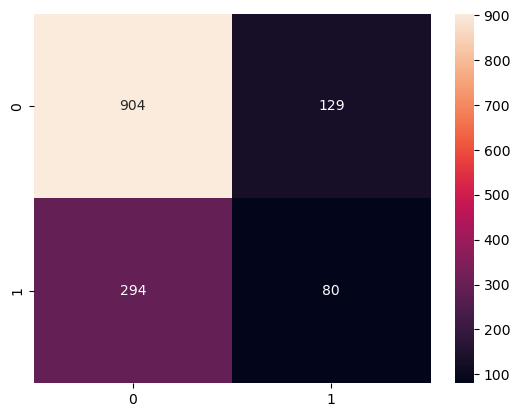

In [67]:
sns.heatmap(cm, annot =  True, fmt= 'd')

In [68]:
final['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [69]:
df0 = final[final['Churn'] == 0]
df0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
6,1,0,0,1,22,1,1,0,1,0,...,89.10,1949.40,0,0,1,0,0,1,0,0
7,0,0,0,0,10,0,0,1,0,0,...,29.75,301.90,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,0,0,0,...,21.15,1419.40,0,0,0,0,1,0,0,0
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,1,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,1,0,0,0,0,1,0


In [70]:
df0.shape

(5163, 24)

In [71]:
df1 = final[final['Churn'] == 1]
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0
5,0,0,0,0,8,1,1,0,0,1,...,99.65,820.50,1,0,1,0,0,0,1,0
8,0,0,1,0,28,1,1,0,0,1,...,104.80,3046.05,1,0,1,0,0,0,1,0
13,1,0,0,0,49,1,1,0,1,1,...,103.70,5036.30,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,0,12,1,0,0,0,0,...,59.80,727.80,1,1,0,1,0,0,1,0
7026,0,0,0,0,9,1,0,0,0,0,...,44.20,403.35,1,1,0,0,0,0,0,0
7032,1,1,0,0,1,1,1,0,0,0,...,75.75,75.75,1,0,1,0,0,0,1,0
7034,0,0,0,0,67,1,1,1,1,1,...,102.95,6886.25,1,0,1,0,0,1,0,0


In [72]:
df1.shape

(1869, 24)

In [73]:
df0_undersample =df0.sample(1869)

In [74]:
df0_undersample.shape

(1869, 24)